In [1]:
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#loading the csv file
medical_data_csv = r"C:\Users\emily\OneDrive\Desktop\Project_4_Group_1\data01.csv"

In [3]:
#reading the csv file
medical_data_df = pd.read_csv(medical_data_csv)

In [4]:
# checking df shape
medical_data_df.shape

(1177, 51)

In [5]:
#cleaning the data
#it only dropped one row
medical_data_df.dropna(subset=['outcome'], inplace=True)

In [6]:
#creating the lab variable df

lab_variables_df = medical_data_df[['ID', 'outcome', 'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Blood potassium', 'glucose', 'Urea nitrogen', 'Creatinine',
                                    'Creatine kinase', 'NT-proBNP', 'INR', 'PT', 'Leucocyte', 'Lymphocyte', 'Basophils', 'Neutrophils',
                                    'Platelets', 'Blood sodium', 'Blood calcium', 'Chloride',
                                     'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
                                     'Lactic acid', 'PCO2', 'EF']]

lab_variables_df.head()


,ID,outcome,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Blood potassium,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,125047,0.0,2155.0,26,3,28,32,90,16,5,...,139,7.0,109,13,3,7.0,21,1.0,40.0,55
1,139812,0.0,1425.0,31,3,31,32,98,14,4,...,139,8.0,98,11,2,7.0,33,1.0,78.0,55
2,109787,0.0,2425.0,28,3,34,31,110,24,6,...,141,8.0,106,10,2,7.0,31,1.0,72.0,35
3,130587,0.0,8760.0,37,4,26,30,86,17,4,...,139,9.0,92,12,2,7.0,39,1.0,75.0,55
4,138290,0.0,4455.0,30,3,31,34,91,16,5,...,137,9.0,105,15,2,7.0,22,1.0,50.0,55


In [7]:
# creating the vital signs df
vital_signs_df = medical_data_df[['ID', 'outcome', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate',
                                  'temperature', 'SP O2']]


vital_signs_df.head()

,ID,outcome,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2
0,125047,0.0,69.0,156.0,68.0,17.0,37.0,98.0
1,139812,0.0,101.0,140.0,65.0,21.0,37.0,97.0
2,109787,0.0,72.0,135.0,61.0,24.0,36.0,95.0
3,130587,0.0,95.0,126.0,73.0,22.0,36.0,94.0
4,138290,0.0,68.0,157.0,58.0,21.0,37.0,99.0


In [8]:
#creating the co-morbidities df

comorbidities_df = medical_data_df[['ID', 'outcome', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
                                    'depression', 'Hyperlipemia', 'CKD (Renal Failure)', 'COPD']]

comorbidities_df.head()

,ID,outcome,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,CKD (Renal Failure),COPD
0,125047,0.0,37.588179,0,0,0,1,1,0,1,1,0
1,139812,0.0,NaN,0,0,0,0,1,0,0,0,1
2,109787,0.0,26.572634,0,0,0,0,1,0,0,1,0
3,130587,0.0,83.264629,0,0,0,0,0,0,0,0,0
4,138290,0.0,31.824842,1,0,0,0,1,0,0,1,1


In [9]:
#creating patient info df
patient_info_df = medical_data_df[['ID', 'group', 'outcome', 'age', 'gendera']]

patient_info_df.head()

,ID,group,outcome,age,gendera
0,125047,1,0.0,72,1
1,139812,1,0.0,75,2
2,109787,1,0.0,83,2
3,130587,1,0.0,43,2
4,138290,1,0.0,75,2


In [10]:
# Export DataFrame to a CSV file named 'database.XXXXX.csv'
patient_info_df.to_csv('database_comorbidities.csv', index=False) 
comorbidities_df.to_csv('database_comorbidities.csv', index=False)  
vital_signs_df.to_csv('database.vital_signs.csv', index=False)
lab_variables_df.to_csv('database.lab_variables.csv', index=False)
medical_data_df.to_csv('database.medical_data.csv', index=False)

In [11]:
# Define features set
X = lab_variables_df.copy()
X.drop("outcome", axis=1, inplace=True)
X.head()

,ID,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Blood potassium,glucose,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,125047,2155.0,26,3,28,32,90,16,5,115.0,...,139,7.0,109,13,3,7.0,21,1.0,40.0,55
1,139812,1425.0,31,3,31,32,98,14,4,148.0,...,139,8.0,98,11,2,7.0,33,1.0,78.0,55
2,109787,2425.0,28,3,34,31,110,24,6,149.0,...,141,8.0,106,10,2,7.0,31,1.0,72.0,35
3,130587,8760.0,37,4,26,30,86,17,4,128.0,...,139,9.0,92,12,2,7.0,39,1.0,75.0,55
4,138290,4455.0,30,3,31,34,91,16,5,146.0,...,137,9.0,105,15,2,7.0,22,1.0,50.0,55


In [12]:
# Define target vector
y = lab_variables_df["outcome"].values.reshape(-1, 1)
y[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [13]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [15]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [16]:
# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)


In [18]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [19]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

In [20]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [21]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [22]:
# Displaying Lab Variables results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,238,24
Actual 1,22,10


Accuracy Score : 0.8435374149659864
Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       262
         1.0       0.29      0.31      0.30        32

    accuracy                           0.84       294
   macro avg       0.60      0.61      0.61       294
weighted avg       0.85      0.84      0.85       294



Accuracy Score: 0.8435374149659864
Classification Report:


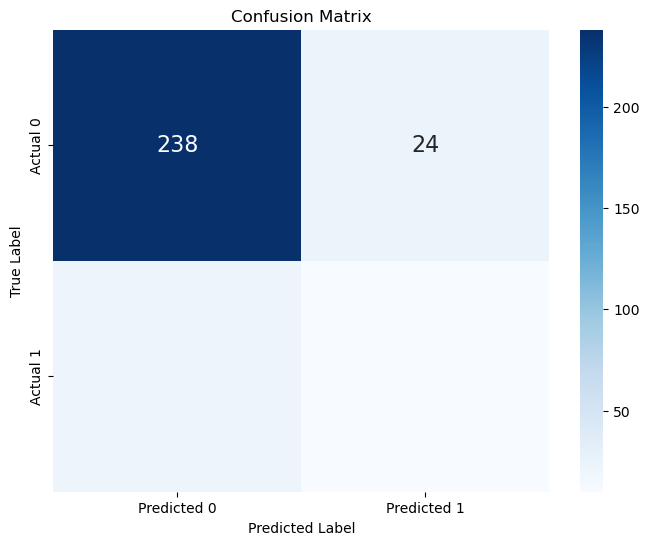

In [25]:

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})

# Add title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save the confusion matrix as a PNG file
plt.savefig("lab_variables_confusion_matrix.png")

# Display accuracy score and classification report
print(f"Accuracy Score: {acc_score}")
print("Classification Report:")




Lab Values as Predicting variables for Inpatient mortality among HF ICU admitted patients:

The accuracy score of the model is 0.854, which means it correctly predicted the class for approximately 85.4% of the instances.

The precision for class 0 (0.91) indicates that when the model predicts an instance as 0, it is correct 91% of the time. The precision for class 1 (0.30) indicates that when the model predicts an instance as 1, it is correct 30% of the time.

The recall for class 0 (0.93) indicates that the model correctly identifies 93% of the actual instances of class 0. The recall for class 1 (0.25) indicates that the model only identifies 25% of the actual instances of class 1.

In [26]:
# Define features set
X = comorbidities_df.copy()
X.drop("outcome", axis=1, inplace=True)
X.head()

,ID,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,CKD (Renal Failure),COPD
0,125047,37.588179,0,0,0,1,1,0,1,1,0
1,139812,NaN,0,0,0,0,1,0,0,0,1
2,109787,26.572634,0,0,0,0,1,0,0,1,0
3,130587,83.264629,0,0,0,0,0,0,0,0,0
4,138290,31.824842,1,0,0,0,1,0,0,1,1


In [27]:
# Define target vector
y = comorbidities_df["outcome"].values.reshape(-1, 1)
y[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [28]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [29]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [30]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [31]:
# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [32]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)

In [33]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [34]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

In [35]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [36]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [37]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,262,0
Actual 1,32,0


Accuracy Score : 0.891156462585034
Classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       262
         1.0       0.00      0.00      0.00        32

    accuracy                           0.89       294
   macro avg       0.45      0.50      0.47       294
weighted avg       0.79      0.89      0.84       294



c:\Users\emily\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\emily\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.891156462585034
Classification Report:


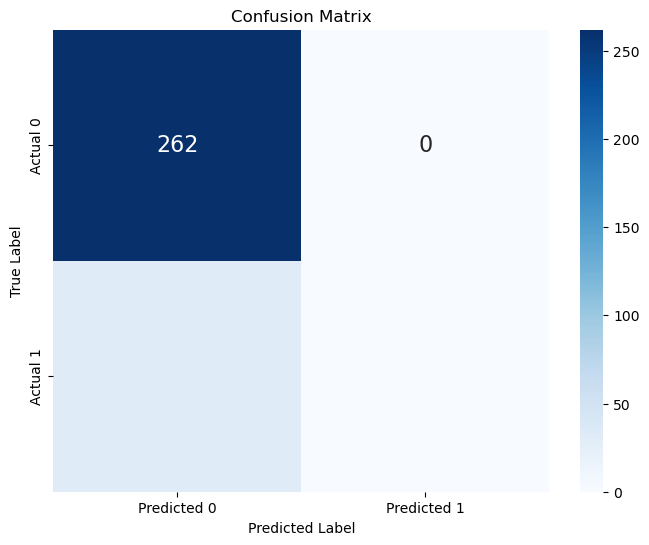

In [38]:
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})

# Add title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save the confusion matrix as a PNG file
plt.savefig("comorbidities_confusion_matrix.png")

# Display accuracy score and classification report
print(f"Accuracy Score: {acc_score}")
print("Classification Report:")



Comorbidities as Predicting variables for Inpatient mortality among HF ICU admitted patients:

The accuracy score of the model is 0.806, which means it correctly predicted the class for approximately 80.6% of the instances.

The precision for class 0 (0.89) indicates that when the model predicts an instance as 0, it is correct 89% of the time. The precision for class 1 (0.07) indicates that when the model predicts an instance as 1, it is correct only 7% of the time.

The recall for class 0 (0.90) indicates that the model correctly identifies 90% of the actual instances of class 0. The recall for class 1 (0.06) indicates that the model only identifies 6% of the actual instances of class 1.


In [39]:
# Define features set
X = vital_signs_df.copy()
X.drop("outcome", axis=1, inplace=True)
X.head()

,ID,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2
0,125047,69.0,156.0,68.0,17.0,37.0,98.0
1,139812,101.0,140.0,65.0,21.0,37.0,97.0
2,109787,72.0,135.0,61.0,24.0,36.0,95.0
3,130587,95.0,126.0,73.0,22.0,36.0,94.0
4,138290,68.0,157.0,58.0,21.0,37.0,99.0


In [40]:
# Define target vector
y = vital_signs_df["outcome"].values.reshape(-1, 1)
y[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [41]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)

# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

# Fit the model
model = model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,227,35
Actual 1,27,5


Accuracy Score : 0.7891156462585034
Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       262
         1.0       0.12      0.16      0.14        32

    accuracy                           0.79       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.81      0.79      0.80       294



Accuracy Score: 0.7891156462585034
Classification Report:


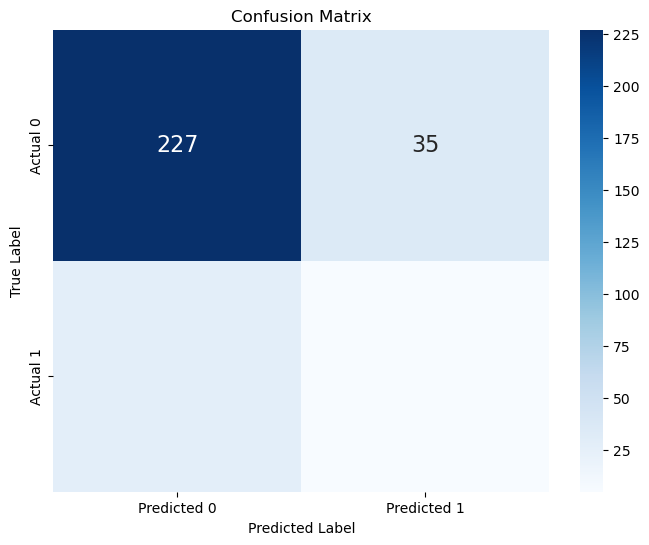

In [42]:
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})

# Add title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save the confusion matrix as a PNG file
plt.savefig("vitalsigns_confusion_matrix.png")

# Display accuracy score and classification report
print(f"Accuracy Score: {acc_score}")
print("Classification Report:")

Vital Signs as predictor variables for Inpatient Mortality among HF ICU admitted patients:

The accuracy score of the model is 0.846, which means it correctly predicted the class for approximately 84.6% of the instances.

The precision for class 0 (0.91) indicates that when the model predicts an instance as 0, it is correct 91% of the time. The precision for class 1 (0.26) indicates that when the model predicts an instance as 1, it is correct only 26% of the time.

The recall for class 0 (0.92) indicates that the model correctly identifies 92% of the actual instances of class 0. The recall for class 1 (0.22) indicates that the model only identifies 22% of the actual instances of class 1.

In [44]:
# Define features set
X = medical_data_df.copy()
X.drop("outcome", axis=1, inplace=True)
X.head()

# Define target vector
y = medical_data_df["outcome"].values.reshape(-1, 1)
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)

# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

# Fit the model
model = model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,234,28
Actual 1,23,9


Accuracy Score : 0.826530612244898
Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       262
         1.0       0.24      0.28      0.26        32

    accuracy                           0.83       294
   macro avg       0.58      0.59      0.58       294
weighted avg       0.84      0.83      0.83       294



All 48 Variables combined as Predictor of Inpatient Mortality among HF admitted ICU Patients:
The accuracy score of the model is 0.776, which means it correctly predicted the class for approximately 77.6% of the instances.

The precision for class 0 (0.91) indicates that when the model predicts an instance as 0, it is correct 91% of the time. The precision for class 1 (0.19) indicates that when the model predicts an instance as 1, it is correct only 19% of the time.

The recall for class 0 (0.83) indicates that the model correctly identifies 83% of the actual instances of class 0. The recall for class 1 (0.31) indicates that the model only identifies 31% of the actual instances of class 1.


Accuracy Score: 0.826530612244898
Classification Report:


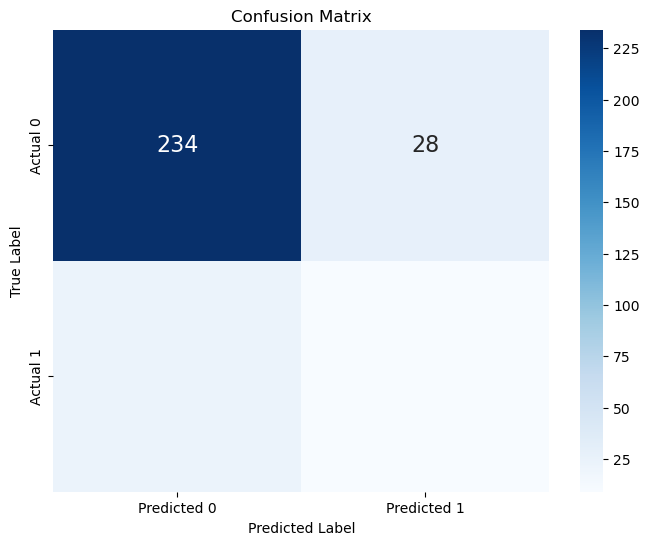

In [45]:
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})

# Add title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save the confusion matrix as a PNG file
plt.savefig("allmedicaldata_confusion_matrix.png")

# Display accuracy score and classification report
print(f"Accuracy Score: {acc_score}")
print("Classification Report:")